# Análise dos casos de óbito de Covid-19 em Indaiatuba

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from scipy.stats import norm

In [2]:
base = pd.read_excel("CovidIndaiatuba.xlsx")

In [3]:
base.head()

,Obitos,Data,Sexo,Idade,anos,Comorbidade
0,1,2020-03-31,Homem,64,anos,Com comorbidades
1,2,2020-04-13,Mulher,50,anos,Com comorbidades
2,3,2020-04-18,Mulher,52,anos,Sem comorbidade
3,4,2020-04-21,Homem,64,anos,Com comorbidades
4,5,2020-04-24,Mulher,61,anos,Com comorbidades


In [4]:
base.groupby(base['Data'].dt.month)['Obitos'].sum()
base['MesMorte'] = base['Data'].dt.month
base['diferencaDias'] = base['Data'] - base['Data'].min()
base['MédiaMovel'] = base['Obitos'].rolling(2).mean()
base

,Obitos,Data,Sexo,Idade,anos,Comorbidade,MesMorte,diferencaDias,MédiaMovel
0,1,2020-03-31,Homem,64,anos,Com comorbidades,3,0 days,NaN
1,2,2020-04-13,Mulher,50,anos,Com comorbidades,4,13 days,1.5
2,3,2020-04-18,Mulher,52,anos,Sem comorbidade,4,18 days,2.5
3,4,2020-04-21,Homem,64,anos,Com comorbidades,4,21 days,3.5
4,5,2020-04-24,Mulher,61,anos,Com comorbidades,4,24 days,4.5
5,6,2020-05-02,Mulher,83,anos,Com comorbidades,5,32 days,5.5
6,7,2020-05-06,Homem,38,anos,Com comorbidades,5,36 days,6.5
7,8,2020-05-06,Homem,76,anos,Com comorbidades,5,36 days,7.5
8,9,2020-05-07,Homem,30,anos,Com comorbidades,5,37 days,8.5
9,10,2020-05-07,Homem,55,anos,Sem comorbidade,5,37 days,9.5


In [5]:
pd.crosstab(base['Sexo'],base['Sexo'])

Sexo,Homem,Mulher
Sexo,,
Homem,34,0
Mulher,0,23


In [63]:
print ('Sexo em %')
Afetados = base['Sexo'].value_counts(normalize=True)
print (str(round(Afetados, 4) *100)) 

Sexo em %
Homem     59.65
Mulher    40.35
Name: Sexo, dtype: float64


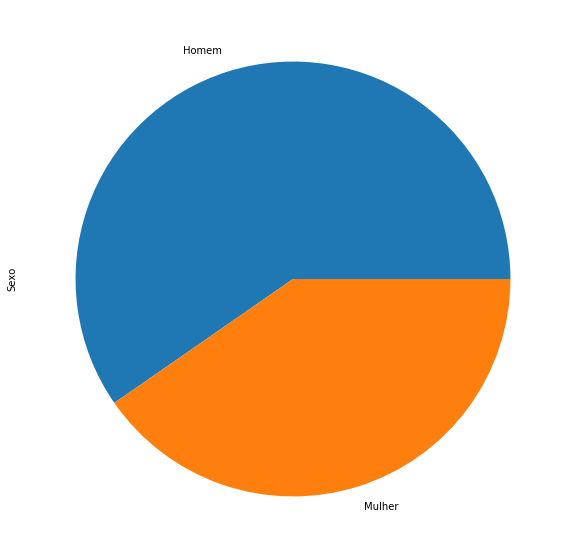

In [7]:
base['Sexo'].value_counts().plot(kind = "pie", figsize = (10,10))

In [8]:
df = base.groupby(base['Data'].dt.month)['Obitos'].count()
df

Data
3     1
4     4
5    22
6    30
Name: Obitos, dtype: int64

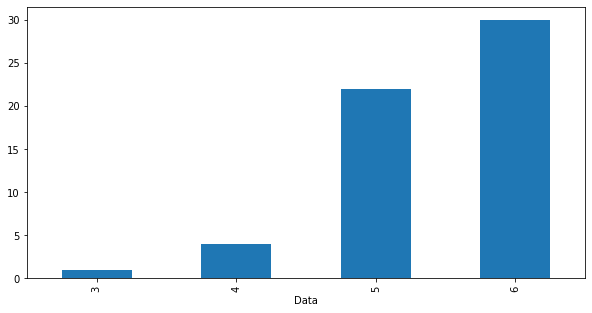

In [9]:
df.plot(kind = "bar", figsize = (10,5))

In [10]:
a = base['diferencaDias'] = base['Data'] - base['Data'].min()
a.tail()

52   83 days
53   83 days
54   85 days
55   85 days
56   86 days
Name: Data, dtype: timedelta64[ns]

In [11]:
pd.crosstab(base['Comorbidade'],base['Comorbidade'])

Comorbidade,Com comorbidades,Sem comorbidade
Comorbidade,,
Com comorbidades,43,0
Sem comorbidade,0,14


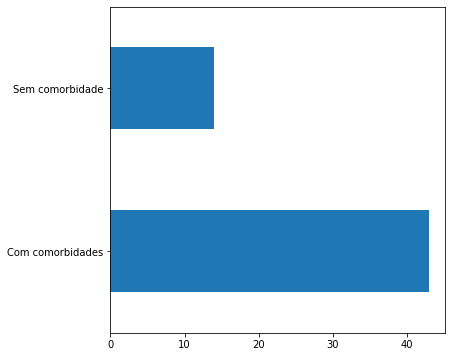

In [12]:
base['Comorbidade'].value_counts().head().plot(kind = "barh", figsize = (6,6))

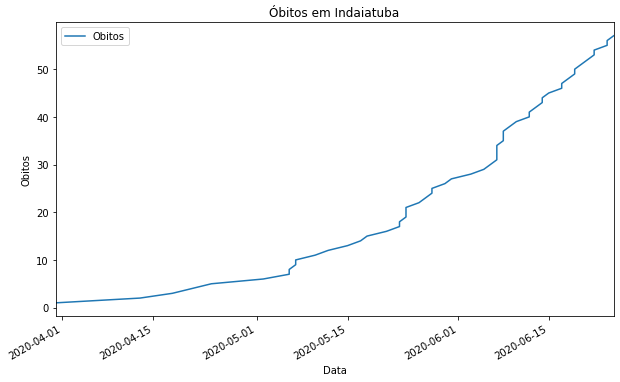

In [13]:
base.plot(x='Data', y='Obitos', figsize=(10,6));
plt.title('Óbitos em Indaiatuba')
plt.ylabel('Obitos')
plt.xlabel('Data')
plt.show()

In [14]:
base['Idade'].mean()

65.24561403508773

In [15]:
base['Idade'].std()

14.618091410687926

In [16]:
base['Idade'].median()

67.0

In [17]:
base['Idade'].mode()

0    67
1    86
dtype: int64

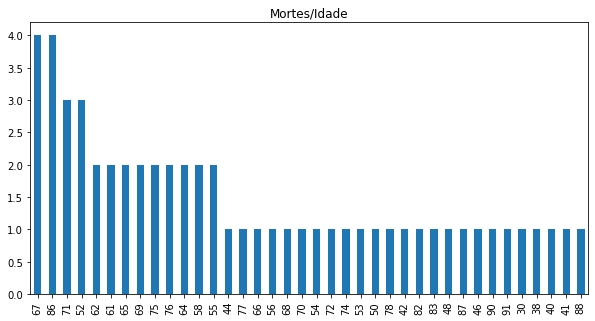

In [18]:
base['Idade'].value_counts().plot(kind='bar',figsize = (10,5), title='Mortes/Idade')

In [19]:
log_returns = np.log(1 + base['Obitos'].pct_change())

In [20]:
base['Obitos'].tail()

52    53
53    54
54    55
55    56
56    57
Name: Obitos, dtype: int64

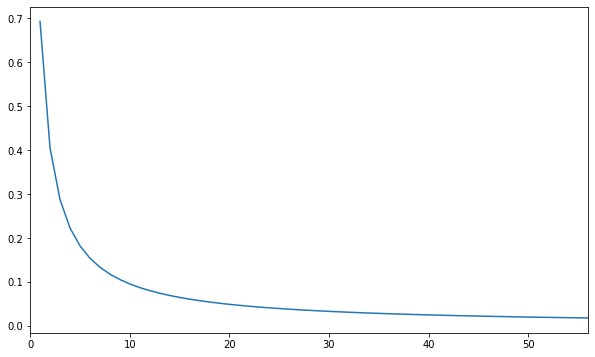

In [21]:
log_returns.plot(figsize=(10,6))

In [22]:
u = log_returns.mean()
u

0.0721973440684741

In [23]:
var = log_returns.var()
var

0.012140871093276887

In [24]:
drift = u - (0.5 * var)
drift

0.06612690852183566

In [25]:
stdev = log_returns.std()
stdev

0.11018562108223054

In [26]:
type(drift)

float

In [27]:
type(stdev)

float

In [28]:
np.array(drift)

array(0.06612691)

In [29]:
drift

0.06612690852183566

In [30]:
stdev

0.11018562108223054

In [31]:
norm.ppf(0.95)

1.6448536269514722

In [32]:
x = np.random.rand(10,2)
x

array([[0.45290765, 0.66523119],
       [0.20314051, 0.75685299],
       [0.5851483 , 0.58722323],
       [0.50774055, 0.14694695],
       [0.90447156, 0.80942822],
       [0.12769601, 0.79081503],
       [0.89865697, 0.87159814],
       [0.22754615, 0.11315939],
       [0.66615835, 0.27823384],
       [0.88522182, 0.2791755 ]])

In [33]:
norm.ppf(x)

array([[-0.11831851,  0.42678269],
       [-0.83045601,  0.69621527],
       [ 0.21508198,  0.22040785],
       [ 0.01940389, -1.04961772],
       [ 1.307459  ,  0.87579119],
       [-1.13734996,  0.80925247],
       [ 1.27393612,  1.13397811],
       [-0.74695238, -1.20989608],
       [ 0.4293297 , -0.58809628],
       [ 1.20150244, -0.58529258]])

In [34]:
z= norm.ppf(np.random.rand(10,4))
z

array([[ 0.65545764, -0.50058368,  0.26170436,  2.16977647],
       [ 0.86418001,  0.1740384 , -1.21871928, -0.4767086 ],
       [-0.42021641,  1.72284599, -1.72613704, -0.73955548],
       [ 1.83163226, -1.07283884, -0.45413167,  0.35945709],
       [ 0.41615204, -0.3739478 , -1.07095874,  0.62594419],
       [-0.21267526, -1.75819278, -0.03896956, -0.80698889],
       [ 0.74428989,  1.28260724, -0.13408407,  1.12219734],
       [-1.5422036 ,  0.12354117, -2.01337776,  0.35416184],
       [-0.50972273,  0.76810862, -0.10181344,  0.54207209],
       [-0.2626304 , -2.28516898,  1.41411667, -0.63792043]])

In [35]:
t_intervals = 30
iterations = 10

In [36]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [37]:
daily_returns

array([[1.0007664 , 1.27404484, 1.16672292, 1.18978513, 1.04679419,
        1.1657962 , 1.11151704, 1.24673548, 1.07684977, 1.12550076],
       [0.9374499 , 1.06617365, 1.23758989, 1.25674993, 0.99660125,
        0.93226437, 1.10092909, 1.03852671, 1.25000461, 1.18978762],
       [0.97079252, 1.28449217, 1.24258565, 0.98250019, 1.10496766,
        1.17083586, 0.95176066, 1.20738768, 1.02531305, 1.37687895],
       [1.10045577, 1.16519616, 1.1016086 , 1.04986899, 1.0996824 ,
        1.11301744, 0.87871243, 1.06119852, 1.24420516, 1.01675289],
       [1.19249831, 0.88159279, 1.05894253, 0.90602388, 0.91618732,
        1.170375  , 1.18227559, 1.11627378, 1.07115407, 1.13281723],
       [1.0984482 , 1.41499587, 1.20745494, 1.18130114, 0.96437845,
        1.25055228, 0.93206993, 1.03459748, 1.18323392, 1.10260091],
       [1.12763207, 0.98573463, 1.09300232, 0.91163114, 0.88020798,
        1.20000806, 1.09019757, 1.06323149, 1.23236068, 1.24506529],
       [1.1535131 , 1.08181866, 1.0100205

In [38]:
S0 = base['Obitos'].iloc[-1]
S0

57

In [39]:
price_list = np.zeros_like(daily_returns)

In [40]:
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [41]:
price_list[0] = S0
price_list

array([[57., 57., 57., 57., 57., 57., 57., 57., 57., 57.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [42]:
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1]* daily_returns[t]

In [43]:
price_list

array([[  57.        ,   57.        ,   57.        ,   57.        ,
          57.        ,   57.        ,   57.        ,   57.        ,
          57.        ,   57.        ],
       [  53.43464433,   60.77189812,   70.54262377,   71.63474616,
          56.8062711 ,   53.139069  ,   62.75295823,   59.19602252,
          71.25026274,   67.81789446],
       [  51.87395316,   78.06102751,   87.65525234,   70.38115139,
          62.76909219,   62.21712768,   59.72579694,   71.47254854,
          73.05382431,   93.37703128],
       [  57.08499087,   90.95640976,   96.56177968,   73.89098836,
          69.02606588,   69.24874805,   52.48180011,   75.84656292,
          90.89394538,   94.94136594],
       [  68.07375503,   80.18651518,  102.25337557,   66.94699974,
          63.24080645,   81.04700361,   62.04795126,   84.66552936,
          97.36141986,  107.55121506],
       [  74.77549337,  113.46358801,  123.46634339,   79.08456699,
          60.9880708 ,  101.35351481,   57.83302987,   87

In [44]:
price_list.min()

42.59662254504535

In [45]:
price_list.max()

1023.7191398783879

In [46]:
price_list.mean()

250.441654981551

In [47]:
price_list.std()

206.5728522750232

In [48]:
np.median(price_list)

182.44566251383887

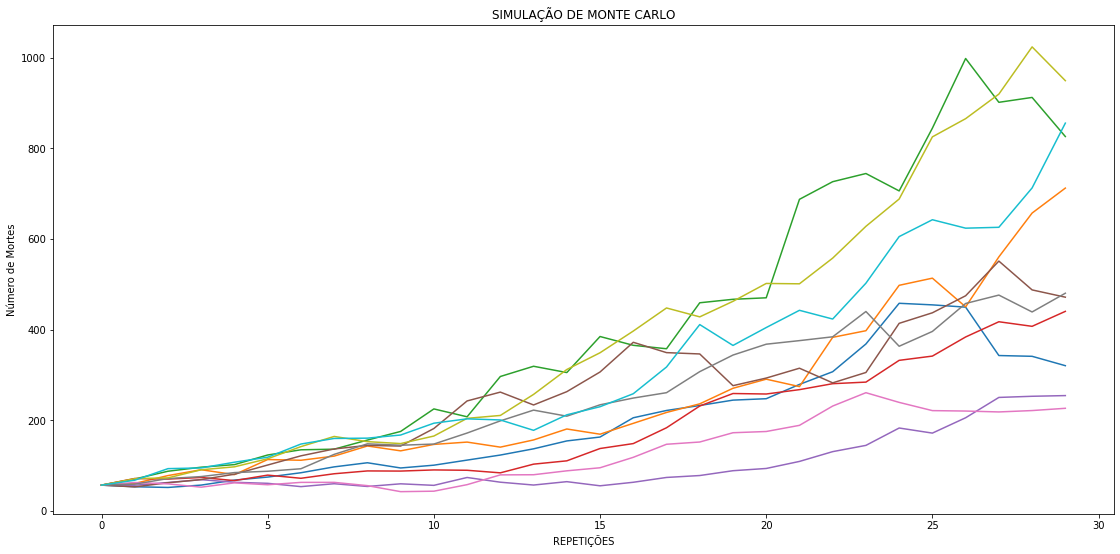

In [49]:
plt.figure(figsize=(19,9))
plt.plot(price_list);
plt.title('SIMULAÇÃO DE MONTE CARLO');
plt.xlabel('REPETIÇÕES'); #definindo nome do eixo X
plt.ylabel('Número de Mortes'); #definindo nome do eixo Y


In [50]:
print(f'Óbitos mínimos, {price_list.min():.0f}'' pessoas')
print(f'Óbitos mediana, {np.median(price_list):.0f}'' pessoas')
print(f'Óbitos médio, {price_list.mean():.0f}'' pessoas')
print(f'Óbitos máximo, {price_list.max():.0f}'' pessoas')
print('Óbitos atual,',(str(round(base['Obitos'].iloc[-1]))),'pessoas') #informar o ticker

Óbitos mínimos, 43 pessoas
Óbitos mediana, 182 pessoas
Óbitos médio, 250 pessoas
Óbitos máximo, 1024 pessoas
Óbitos atual, 57 pessoas


In [51]:
S0

57

In [52]:
diferencaDias = base['diferencaDias'] = base['Data'] - base['Data'].min()

In [53]:
d = a.loc[56:].astype('timedelta64[D]')

In [54]:
d

56    86.0
Name: Data, dtype: float64

In [55]:
MortesDia = S0/d

In [56]:
MortesDia

56    0.662791
Name: Data, dtype: float64